# EDA

In [1]:
%reload_ext autoreload
%autoreload 2

# check if working in colab
try:
    # In colab
    from google.colab import drive
    drive.mount('/content/drive')

    %cd /content/drive/MyDrive/projects/paris-traffic-forecast
    %pip install -q darts

except:
    # In local
    # replace with your path
    %cd ..

/mnt/d/Google Drive/projects/paris-traffic-forecast


In [2]:
# Import libraries
import matplotlib.pyplot as plt

## All years for some arcs

### load data

#### load from open data paris

In [ ]:
# read txt files from folder
from tqdm import tqdm
import glob
import pandas as pd
# Get folder path containing text files
file_list = glob.glob("data/*.csv")

useful_columns = ["libelle", "libelle_nd_amont", "libelle_nd_aval", "t_1h", "q", "k"] # drop rows with these missing values
keep_columns = useful_columns + ["etat_barre"]

# select arcs to filter by
# amont = ["Lecourbe-Convention", "Sts_Peres-Voltaire"]
# aval = ["Convention-Blomet", "Sts_Peres-Universite"]
amont_aval = [['Av_Champs_Elysees-Washington', 'Av_Georges_V-Place_Dunant'],
 ['Pl_Concorde-Av_Champs_Elysees', 'Av_Champs_Elysees-Dutuit'],
 ['Av_Champs_Elysees-Colisee', 'Rond_Point_Champs_Elysees'],
 ['Av_Champs_Elysees-La_Boetie', 'Av_Champs_Elysees-Berri'],
 ['Concorde_Ouest', 'Pl_Concorde-Av_Champs_Elysees'],
 ['Av_Champs_Elysees-Berri', 'Av_Champs_Elysees-Washington'],
 ['Av_Champs_Elysees-Face_Air_Franc', 'Av_Champs_Elysees-Balzac'],
 ['Pl_Concorde-Av_Champs_Elysees', 'Cours_la_Reine-Concorde'],
 ['Champs-Tilsitt', 'Av_Champs_Elysees-Face_Air_Franc'],
 ['Cours_la_Reine-Concorde', 'Sortie_Souterrain_Champs_Elysees'],
 ['Sortie_Souterrain_Champs_Elysees', 'Tuileries-Sedar_Senghor'],
 ['Av_Champs_Elysees-Face_Air_Franc', 'Grande_Armee-Forge'],
 ['Av_Champs_Elysees-Clemenceau', 'Rond_Point_Champs_Elysees'],
 ['Rond_Point_Champs_Elysees', 'Av_Champs_Elysees-Clemenceau'],
 ['Av_Champs_Elysees-Washington', 'Av_Champs_Elysees-Berri'],
 ['Av_Champs_Elysees-Colisee', 'Av_Champs_Elysees-La_Boetie'],
 ['Av_Champs_Elysees-Dutuit', 'Av_Champs_Elysees-Clemenceau'],
 ['Rond_Point_Champs_Elysees', 'Av_Champs_Elysees-Colisee'],
 ['Av_Champs_Elysees-Balzac', 'Av_Champs_Elysees-Washington'],
 ['Av_Champs_Elysees-Berri', 'Av_Champs_Elysees-La_Boetie'],
 ['Av_Georges_V-Place_Dunant', 'Av_Champs_Elysees-Washington']]

amont_aval += [['Convention-St_Charles', 'Convention-Lourmel'],
 ['Convention-Felix_Faure', 'Convention-Nivert'],
 ['Convention-Lourmel', 'Convention-St_Charles'],
 ['Convention-Blomet', 'Convention-Vaugirard'],
 ['Convention-St_Charles', 'Convention-Gutemberg'],
 ['Convention-Felix_Faure', 'Convention-Lourmel'],
 ['Convention-Lourmel', 'Convention-Felix_Faure'],
 ['Convention-Nivert', 'Convention-Felix_Faure'],
 ['Faure-Javel', 'Convention-Felix_Faure'],
 ['Convention-Gutemberg', 'Convention-St_Charles'],
 ['Convention-Nivert', 'Lecourbe-Convention'],
 ['Convention-Gutemberg', 'Rond_Point_Mirabeau'],
 ['Convention-Vaugirard', 'Convention-Olivier_de_Serres'],
 ['Convention-Felix_Faure', 'Faure-Javel'],
 ['Lecourbe-Convention', 'Convention-Nivert'],
 ['Rond_Point_Mirabeau', 'Convention-Gutemberg'],
 ['Lecourbe-Convention', 'Convention-Blomet'],
 ['Convention-Olivier_de_Serres', 'Place_Charles_Valin'],
 ['Lecourbe-Convention', 'Lecourbe-Croix-Nivert']]

amont_aval += [['Sevres-Babylone', 'Sevres-Sts_Peres'],
 ['Sts_Peres-Voltaire', 'Sts_Peres-Universite'],
 ['Bd_St_Germain-St_Guillaume', 'Bd_St_Germain-Sts_Peres'],
 ['Sts_Peres-Grenelle', 'Sevres-Sts_Peres'],
 ['Sts_Peres-Universite', 'Bd_St_Germain-Sts_Peres'],
 ['Malaquais-Bonaparte', 'Sts_Peres-Voltaire'],
 ['Bd_St_Germain-Sts_Peres', 'Sts_Peres-Grenelle'],
 ['Bd_St_Germain-Sts_Peres', 'Bd_St_Germain-Dragon']]

all_df = pd.DataFrame()
for file_path in tqdm(file_list):
    df =  pd.read_csv(file_path, delimiter=";")
    df = df.iloc[:,[1, 2, 3, 4, 10, 7, 9]]
    df.columns = ["libelle", "t_1h", "q", "k", "etat_barre", "libelle_nd_amont", "libelle_nd_aval"]
    df['etat_barre'] = df['etat_barre'].apply(lambda x: 3 if x.startswith("I") else 2)

    df = df[keep_columns]
    # drop rows where q or k is null
    df.dropna(subset=useful_columns, inplace=True)
    for amont_arc, aval_arc in amont_aval:
        # filter by amont and aval arcs
        all_df = all_df.append(df[(df["libelle_nd_amont"] == amont_arc) & (df["libelle_nd_aval"] == aval_arc)], ignore_index=True)
all_df.rename(columns={"libelle": "arc", "libelle_nd_amont": "noeud_amont", "libelle_nd_aval": "noeud_aval", "q":"debit", "k":"occupation", "t_1h":"time"}, inplace=True)
all_df.drop_duplicates(subset=["arc", "noeud_amont", "noeud_aval", "time"], keep="first", inplace=True)
all_df

100%|██████████| 4/4 [00:06<00:00,  1.74s/it]


,arc,noeud_amont,noeud_aval,time,debit,occupation,etat_barre
0,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2021-04-02T12:00:00+02:00,651.0,8.44667,3
1,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2021-07-08T00:00:00+02:00,742.0,8.46056,3
2,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2021-07-07T20:00:00+02:00,899.0,9.77389,3
3,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2021-07-07T18:00:00+02:00,852.0,11.03556,3
4,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2021-04-02T18:00:00+02:00,634.0,7.23611,3
...,...,...,...,...,...,...,...
189192,VGP_Souterrain_Concorde,Cours_la_Reine-Concorde,Sortie_Souterrain_Champs_Elysees,2021-08-01T03:00:00+02:00,638.0,0.89222,3
189193,VGP_Souterrain_Concorde,Cours_la_Reine-Concorde,Sortie_Souterrain_Champs_Elysees,2021-08-01T04:00:00+02:00,370.0,0.41389,3
189194,VGP_Souterrain_Concorde,Cours_la_Reine-Concorde,Sortie_Souterrain_Champs_Elysees,2021-11-01T02:00:00+01:00,677.0,1.27055,3
189195,VGP_Souterrain_Concorde,Cours_la_Reine-Concorde,Sortie_Souterrain_Champs_Elysees,2021-11-01T01:00:00+01:00,758.0,1.65445,3


In [ ]:
 ['Lecourbe-Convention', 'Convention-Blomet'],
 ['Av_Champs_Elysees-Washington', 'Av_Champs_Elysees-Berri'],
[['Sts_Peres-Voltaire', 'Sts_Peres-Universite'],


In [ ]:
# filter rows where noeud_amont or noeud_aval containts "champs"
# df = all_df[all_df["noeud_amont"].str.lower().str.contains("sts_peres") | all_df["noeud_aval"].str.lower().str.contains("sts_peres")]
# get zip of  unique noeud_amont and noeud_aval combinations
df_unique = all_df.drop_duplicates(subset=["noeud_amont", "noeud_aval"])
zipset = df_unique[["noeud_amont", "noeud_aval"]].values.tolist()
zipset

[['Sts_Peres-Voltaire', 'Sts_Peres-Universite'],
 ['Bd_St_Germain-St_Guillaume', 'Bd_St_Germain-Sts_Peres'],
 ['Sts_Peres-Grenelle', 'Sevres-Sts_Peres'],
 ['Sts_Peres-Universite', 'Bd_St_Germain-Sts_Peres'],
 ['Malaquais-Bonaparte', 'Sts_Peres-Voltaire'],
 ['Bd_St_Germain-Sts_Peres', 'Sts_Peres-Grenelle'],
 ['Bd_St_Germain-Sts_Peres', 'Bd_St_Germain-Dragon'],
 ['Convention-St_Charles', 'Convention-Lourmel'],
 ['Convention-Blomet', 'Convention-Vaugirard'],
 ['Convention-Lourmel', 'Convention-Felix_Faure'],
 ['Convention-Vaugirard', 'Convention-Olivier_de_Serres'],
 ['Rond_Point_Mirabeau', 'Convention-Gutemberg'],
 ['Lecourbe-Convention', 'Convention-Blomet'],
 ['Convention-Olivier_de_Serres', 'Place_Charles_Valin'],
 ['Pl_Concorde-Av_Champs_Elysees', 'Av_Champs_Elysees-Dutuit'],
 ['Av_Champs_Elysees-Colisee', 'Rond_Point_Champs_Elysees'],
 ['Av_Champs_Elysees-La_Boetie', 'Av_Champs_Elysees-Berri'],
 ['Av_Champs_Elysees-Berri', 'Av_Champs_Elysees-Washington'],
 ['Av_Champs_Elysees-Clemen

In [ ]:
all_df[all_df["noeud_amont"] == "Convention-Blomet"]

In [ ]:
orig = all_df

In [ ]:
all_df.to_csv("all_df.csv", index=False)

In [ ]:
# select arcs to work with
amont = ["Sts_Peres-Voltaire"]
aval = ["Sts_Peres-Universite"]

amont_aval = [
 ['Lecourbe-Convention', 'Convention-Blomet'],
 ['Av_Champs_Elysees-Washington', 'Av_Champs_Elysees-Berri'],
['Sts_Peres-Voltaire', 'Sts_Peres-Universite']]


df = pd.DataFrame()
for amont_arc, aval_arc in amont_aval[2:]:
    # filter by amont and aval arcs
    df = df.append(all_df[(all_df["noeud_amont"] == amont_arc) & (all_df["noeud_aval"] == aval_arc)])
print(df['arc'].unique())
# df.drop_duplicates(inplace=True)
df = df.sort_values(by=["time"])
df

['Sts_Peres']


,arc,noeud_amont,noeud_aval,time,debit,occupation,etat_barre
7751,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2021-01-01T00:00:00+01:00,52.0,0.96056,3
7793,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2021-01-01T01:00:00+01:00,56.0,1.28056,3
7795,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2021-01-01T02:00:00+01:00,71.0,1.24667,3
7794,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2021-01-01T03:00:00+01:00,48.0,0.76333,3
242,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2021-01-01T04:00:00+01:00,69.0,1.23222,3
...,...,...,...,...,...,...,...
2585,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2021-12-09T20:00:00+01:00,759.0,11.37222,3
2584,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2021-12-09T21:00:00+01:00,720.0,10.49445,3
2583,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2021-12-09T22:00:00+01:00,571.0,8.91667,3
2587,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2021-12-09T23:00:00+01:00,547.0,6.87500,3


In [ ]:
df['time'] = df['time'].apply(lambda x: x[:-6]+"+00:00")

In [ ]:
old_df = pd.read_csv('raw_data/sts_peres-2014-2020.csv').set_index('time')
old_df.index = pd.to_datetime(old_df.index, utc=False)
old_df.sort_index(inplace=True)
old_df

,arc,noeud_amont,noeud_aval,debit,occupation,etat_barre
time,,,,,,
2014-01-01 01:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,486.0,6.17889,3
2014-01-01 02:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,571.0,6.66222,3
2014-01-01 03:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,532.0,5.56611,3
2014-01-01 04:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,458.0,4.63444,3
2014-01-01 05:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,386.0,3.94500,3
...,...,...,...,...,...,...
2020-12-31 20:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,338.0,4.53334,3
2020-12-31 21:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,195.0,2.34556,3
2020-12-31 22:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,129.0,1.80222,3


In [ ]:
import pandas as pd
time_col = "time"
value_cols = ['debit', "occupation", "etat_barre"]
# set datetime index
# df[time_col] = pd.to_datetime(df[time_col], utc=True).tz_localize(None)
df[time_col] = pd.to_datetime(df[time_col])
df[time_col] = pd.DatetimeIndex(df[time_col]).tz_localize(None)
df = df.set_index(time_col)
# sort df by index
df

,arc,noeud_amont,noeud_aval,debit,occupation,etat_barre
time,,,,,,
2021-01-01 00:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,52.0,0.96056,3
2021-01-01 01:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,56.0,1.28056,3
2021-01-01 02:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,71.0,1.24667,3
2021-01-01 03:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,48.0,0.76333,3
2021-01-01 04:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,69.0,1.23222,3
...,...,...,...,...,...,...
2021-12-09 20:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,759.0,11.37222,3
2021-12-09 21:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,720.0,10.49445,3
2021-12-09 22:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,571.0,8.91667,3


In [ ]:
df = df.iloc[1:]

df = old_df.append(df, verify_integrity=True)
# drop duplicated indexes
df[df.index.duplicated()]



,arc,noeud_amont,noeud_aval,debit,occupation,etat_barre
time,,,,,,


In [ ]:
ts = TimeSeries.from_dataframe(df, 
                    value_cols=value_cols,
                    fill_missing_dates=True,
                    freq='H'
                    )

In [ ]:
df.describe()

,debit,occupation,etat_barre
count,67702.000000,67702.000000,67702.000000
mean,470.721515,7.149994,2.973280
std,272.289232,6.283867,0.161265
min,0.000000,0.000000,2.000000
25%,223.000000,2.598340,3.000000
50%,492.000000,5.875000,3.000000
75%,687.000000,9.461110,3.000000
max,1393.000000,57.641100,3.000000


In [ ]:
# remove debit values bigger than 10000
df = df[df["debit"] < 20000]

In [ ]:
voisinages = []
for i, x in df.groupby(["noeud_amont", "noeud_aval"]):
    voisinages.append({'noeud_amont':i[0], 'noeud_aval':i[1], 'df':x})


In [ ]:
from darts import TimeSeries

# transform data to TimeSeries
for voi in voisinages:
    ts = TimeSeries.from_dataframe(voi["df"], 
                            value_cols=value_cols,
                            fill_missing_dates=True,
                            freq='H'
                            )
    voi["ts"] = ts
ts

<TimeSeries (DataArray) (time: 61368, component: 3, sample: 1)>
array([[[486.     ],
        [  6.17889],
        [  3.     ]],

       [[571.     ],
        [  6.66222],
        [  3.     ]],

       [[532.     ],
        [  5.56611],
        [  3.     ]],

       ...,

       [[129.     ],
        [  1.80222],
        [  3.     ]],

       [[ 77.     ],
        [  1.18389],
        [  3.     ]],

       [[ 52.     ],
        [  0.96056],
        [  3.     ]]])
Coordinates:
  * time       (time) datetime64[ns] 2014-01-01T01:00:00 ... 2021-01-01
  * component  (component) object 'debit' 'occupation' 'etat_barre'
Dimensions without coordinates: sample

In [ ]:
for voi in voisinages:
    # delete df key
    del voi["df"]

In [ ]:
import joblib
joblib.dump(voisinages, "raw_data/voi-sts_peres.pkl")

['raw_data/voi-sts_peres.pkl']

In [3]:
df = pd.read_csv('data/rech_champs_elysees.csv', delimiter=';')

NameError: name 'pd' is not defined

In [195]:
df.columns

Index(['Identifiant arc', 'Libelle', 'Date et heure de comptage',
       'Débit horaire', 'Taux d'occupation', 'Etat trafic',
       'Identifiant noeud amont', 'Libelle noeud amont',
       'Identifiant noeud aval', 'Libelle noeud aval', 'Etat arc',
       'Date debut dispo data', 'Date fin dispo data', 'geo_point_2d',
       'geo_shape'],
      dtype='object')

In [196]:
df.head(1)

,Identifiant arc,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,geo_shape
0,4272,Av_Champs_Elysees,2021-10-14T00:00:00+02:00,8.0,5.72944,Fluide,2300,Av_Champs_Elysees-La_Boetie,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8710753632,2.3039212731","{""type"": ""LineString"", ""coordinates"": [[2.3053..."


In [197]:
df = df.iloc[:,[1, 2, 3, 4, 10, 7, 9]]
df.columns = ["libelle", "t_1h", "q", "k", "etat_barre", "libelle_nd_amont", "libelle_nd_aval"]
df

,libelle,t_1h,q,k,etat_barre,libelle_nd_amont,libelle_nd_aval
0,Av_Champs_Elysees,2021-10-14T00:00:00+02:00,8.0,5.72944,Invalide,Av_Champs_Elysees-La_Boetie,Av_Champs_Elysees-Berri
1,Av_Champs_Elysees,2021-10-13T23:00:00+02:00,27.0,6.24000,Invalide,Av_Champs_Elysees-La_Boetie,Av_Champs_Elysees-Berri
2,Av_Champs_Elysees,2021-10-13T22:00:00+02:00,42.0,5.00722,Invalide,Av_Champs_Elysees-La_Boetie,Av_Champs_Elysees-Berri
3,Av_Champs_Elysees,2021-10-13T19:00:00+02:00,241.0,1.83222,Invalide,Av_Champs_Elysees-La_Boetie,Av_Champs_Elysees-Berri
4,Av_Champs_Elysees,2021-10-13T18:00:00+02:00,172.0,2.15444,Invalide,Av_Champs_Elysees-La_Boetie,Av_Champs_Elysees-Berri
...,...,...,...,...,...,...,...
216797,Av_Champs_Elysees,2021-09-01T01:00:00+02:00,NaN,NaN,Invalide,Av_Champs_Elysees-Balzac,Av_Champs_Elysees-Washington
216798,Av_Champs_Elysees,2021-09-01T01:00:00+02:00,NaN,NaN,Invalide,Av_Champs_Elysees-Face_Air_Franc,Av_Champs_Elysees-Balzac
216799,Av_Champs_Elysees,2021-09-01T01:00:00+02:00,506.0,1.72333,Invalide,Rond_Point_Champs_Elysees,Av_Champs_Elysees-Colisee
216800,Av_Champs_Elysees,2021-09-01T01:00:00+02:00,NaN,NaN,Invalide,Rond_Point_Champs_Elysees,Av_Champs_Elysees-Clemenceau


In [201]:
# replace values in etat_barre
df['etat_barre'] = df['etat_barre'].apply(lambda x: 3 if x.startswith("I") else 2)

In [207]:
file_list

['data/comptages-routiers-permanents (1).csv',
 'data/comptages-routiers-permanents (2).csv',
 'data/rech_champs_elysees.csv',
 'data/rech_souterain_champs_elysees.csv']

In [303]:
# read txt files from folder
from tqdm import tqdm
import glob
import pandas as pd
# Get folder path containing text files
file_list = glob.glob("data/*.csv")

useful_columns = ["libelle", "libelle_nd_amont", "libelle_nd_aval", "t_1h", "q", "k"] # drop rows with these missing values
keep_columns = useful_columns + ["etat_barre"]

# select arcs to filter by
# amont = ["Lecourbe-Convention", "Sts_Peres-Voltaire"]
# aval = ["Convention-Blomet", "Sts_Peres-Universite"]
amont_aval = [['Av_Champs_Elysees-Washington', 'Av_Georges_V-Place_Dunant'],
 ['Pl_Concorde-Av_Champs_Elysees', 'Av_Champs_Elysees-Dutuit'],
 ['Av_Champs_Elysees-Colisee', 'Rond_Point_Champs_Elysees'],
 ['Av_Champs_Elysees-La_Boetie', 'Av_Champs_Elysees-Berri'],
 ['Concorde_Ouest', 'Pl_Concorde-Av_Champs_Elysees'],
 ['Av_Champs_Elysees-Berri', 'Av_Champs_Elysees-Washington'],
 ['Av_Champs_Elysees-Face_Air_Franc', 'Av_Champs_Elysees-Balzac'],
 ['Pl_Concorde-Av_Champs_Elysees', 'Cours_la_Reine-Concorde'],
 ['Champs-Tilsitt', 'Av_Champs_Elysees-Face_Air_Franc'],
 ['Cours_la_Reine-Concorde', 'Sortie_Souterrain_Champs_Elysees'],
 ['Sortie_Souterrain_Champs_Elysees', 'Tuileries-Sedar_Senghor'],
 ['Av_Champs_Elysees-Face_Air_Franc', 'Grande_Armee-Forge'],
 ['Av_Champs_Elysees-Clemenceau', 'Rond_Point_Champs_Elysees'],
 ['Rond_Point_Champs_Elysees', 'Av_Champs_Elysees-Clemenceau'],
 ['Av_Champs_Elysees-Washington', 'Av_Champs_Elysees-Berri'],
 ['Av_Champs_Elysees-Colisee', 'Av_Champs_Elysees-La_Boetie'],
 ['Av_Champs_Elysees-Dutuit', 'Av_Champs_Elysees-Clemenceau'],
 ['Rond_Point_Champs_Elysees', 'Av_Champs_Elysees-Colisee'],
 ['Av_Champs_Elysees-Balzac', 'Av_Champs_Elysees-Washington'],
 ['Av_Champs_Elysees-Berri', 'Av_Champs_Elysees-La_Boetie'],
 ['Av_Georges_V-Place_Dunant', 'Av_Champs_Elysees-Washington']]

amont_aval += [['Convention-St_Charles', 'Convention-Lourmel'],
 ['Convention-Felix_Faure', 'Convention-Nivert'],
 ['Convention-Lourmel', 'Convention-St_Charles'],
 ['Convention-Blomet', 'Convention-Vaugirard'],
 ['Convention-St_Charles', 'Convention-Gutemberg'],
 ['Convention-Felix_Faure', 'Convention-Lourmel'],
 ['Convention-Lourmel', 'Convention-Felix_Faure'],
 ['Convention-Nivert', 'Convention-Felix_Faure'],
 ['Faure-Javel', 'Convention-Felix_Faure'],
 ['Convention-Gutemberg', 'Convention-St_Charles'],
 ['Convention-Nivert', 'Lecourbe-Convention'],
 ['Convention-Gutemberg', 'Rond_Point_Mirabeau'],
 ['Convention-Vaugirard', 'Convention-Olivier_de_Serres'],
 ['Convention-Felix_Faure', 'Faure-Javel'],
 ['Lecourbe-Convention', 'Convention-Nivert'],
 ['Rond_Point_Mirabeau', 'Convention-Gutemberg'],
 ['Lecourbe-Convention', 'Convention-Blomet'],
 ['Convention-Olivier_de_Serres', 'Place_Charles_Valin'],
 ['Lecourbe-Convention', 'Lecourbe-Croix-Nivert']]

amont_aval += [['Sevres-Babylone', 'Sevres-Sts_Peres'],
 ['Sts_Peres-Voltaire', 'Sts_Peres-Universite'],
 ['Bd_St_Germain-St_Guillaume', 'Bd_St_Germain-Sts_Peres'],
 ['Sts_Peres-Grenelle', 'Sevres-Sts_Peres'],
 ['Sts_Peres-Universite', 'Bd_St_Germain-Sts_Peres'],
 ['Malaquais-Bonaparte', 'Sts_Peres-Voltaire'],
 ['Bd_St_Germain-Sts_Peres', 'Sts_Peres-Grenelle'],
 ['Bd_St_Germain-Sts_Peres', 'Bd_St_Germain-Dragon']]

all_df = pd.DataFrame()
for file_path in tqdm(file_list):
    df =  pd.read_csv(file_path, delimiter=";")
    df = df.iloc[:,[1, 2, 3, 4, 10, 7, 9]]
    df.columns = ["libelle", "t_1h", "q", "k", "etat_barre", "libelle_nd_amont", "libelle_nd_aval"]
    df['etat_barre'] = df['etat_barre'].apply(lambda x: 3 if x.startswith("I") else 2)

    df = df[keep_columns]
    # drop rows where q or k is null
    df.dropna(subset=useful_columns, inplace=True)
    for amont_arc, aval_arc in amont_aval:
        # filter by amont and aval arcs
        all_df = all_df.append(df[(df["libelle_nd_amont"] == amont_arc) & (df["libelle_nd_aval"] == aval_arc)], ignore_index=True)
all_df.rename(columns={"libelle": "arc", "libelle_nd_amont": "noeud_amont", "libelle_nd_aval": "noeud_aval", "q":"debit", "k":"occupation", "t_1h":"time"}, inplace=True)
all_df.drop_duplicates(subset=["arc", "noeud_amont", "noeud_aval", "time"], keep="first", inplace=True)
all_df

100%|██████████| 4/4 [00:06<00:00,  1.74s/it]


,arc,noeud_amont,noeud_aval,time,debit,occupation,etat_barre
0,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2021-04-02T12:00:00+02:00,651.0,8.44667,3
1,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2021-07-08T00:00:00+02:00,742.0,8.46056,3
2,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2021-07-07T20:00:00+02:00,899.0,9.77389,3
3,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2021-07-07T18:00:00+02:00,852.0,11.03556,3
4,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2021-04-02T18:00:00+02:00,634.0,7.23611,3
...,...,...,...,...,...,...,...
189192,VGP_Souterrain_Concorde,Cours_la_Reine-Concorde,Sortie_Souterrain_Champs_Elysees,2021-08-01T03:00:00+02:00,638.0,0.89222,3
189193,VGP_Souterrain_Concorde,Cours_la_Reine-Concorde,Sortie_Souterrain_Champs_Elysees,2021-08-01T04:00:00+02:00,370.0,0.41389,3
189194,VGP_Souterrain_Concorde,Cours_la_Reine-Concorde,Sortie_Souterrain_Champs_Elysees,2021-11-01T02:00:00+01:00,677.0,1.27055,3
189195,VGP_Souterrain_Concorde,Cours_la_Reine-Concorde,Sortie_Souterrain_Champs_Elysees,2021-11-01T01:00:00+01:00,758.0,1.65445,3


In [ ]:
 ['Lecourbe-Convention', 'Convention-Blomet'],
 ['Av_Champs_Elysees-Washington', 'Av_Champs_Elysees-Berri'],
[['Sts_Peres-Voltaire', 'Sts_Peres-Universite'],


In [210]:
# filter rows where noeud_amont or noeud_aval containts "champs"
# df = all_df[all_df["noeud_amont"].str.lower().str.contains("sts_peres") | all_df["noeud_aval"].str.lower().str.contains("sts_peres")]
# get zip of  unique noeud_amont and noeud_aval combinations
df_unique = all_df.drop_duplicates(subset=["noeud_amont", "noeud_aval"])
zipset = df_unique[["noeud_amont", "noeud_aval"]].values.tolist()
zipset

[['Sts_Peres-Voltaire', 'Sts_Peres-Universite'],
 ['Bd_St_Germain-St_Guillaume', 'Bd_St_Germain-Sts_Peres'],
 ['Sts_Peres-Grenelle', 'Sevres-Sts_Peres'],
 ['Sts_Peres-Universite', 'Bd_St_Germain-Sts_Peres'],
 ['Malaquais-Bonaparte', 'Sts_Peres-Voltaire'],
 ['Bd_St_Germain-Sts_Peres', 'Sts_Peres-Grenelle'],
 ['Bd_St_Germain-Sts_Peres', 'Bd_St_Germain-Dragon'],
 ['Convention-St_Charles', 'Convention-Lourmel'],
 ['Convention-Blomet', 'Convention-Vaugirard'],
 ['Convention-Lourmel', 'Convention-Felix_Faure'],
 ['Convention-Vaugirard', 'Convention-Olivier_de_Serres'],
 ['Rond_Point_Mirabeau', 'Convention-Gutemberg'],
 ['Lecourbe-Convention', 'Convention-Blomet'],
 ['Convention-Olivier_de_Serres', 'Place_Charles_Valin'],
 ['Pl_Concorde-Av_Champs_Elysees', 'Av_Champs_Elysees-Dutuit'],
 ['Av_Champs_Elysees-Colisee', 'Rond_Point_Champs_Elysees'],
 ['Av_Champs_Elysees-La_Boetie', 'Av_Champs_Elysees-Berri'],
 ['Av_Champs_Elysees-Berri', 'Av_Champs_Elysees-Washington'],
 ['Av_Champs_Elysees-Clemen

In [ ]:
all_df[all_df["noeud_amont"] == "Convention-Blomet"]

In [79]:
orig = all_df

In [88]:
all_df.to_csv("all_df.csv", index=False)

In [412]:
# select arcs to work with
amont = ["Sts_Peres-Voltaire"]
aval = ["Sts_Peres-Universite"]

amont_aval = [
 ['Lecourbe-Convention', 'Convention-Blomet'],
 ['Av_Champs_Elysees-Washington', 'Av_Champs_Elysees-Berri'],
['Sts_Peres-Voltaire', 'Sts_Peres-Universite']]


df = pd.DataFrame()
for amont_arc, aval_arc in amont_aval[2:]:
    # filter by amont and aval arcs
    df = df.append(all_df[(all_df["noeud_amont"] == amont_arc) & (all_df["noeud_aval"] == aval_arc)])
print(df['arc'].unique())
# df.drop_duplicates(inplace=True)
df = df.sort_values(by=["time"])
df

['Sts_Peres']


,arc,noeud_amont,noeud_aval,time,debit,occupation,etat_barre
7751,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2021-01-01T00:00:00+01:00,52.0,0.96056,3
7793,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2021-01-01T01:00:00+01:00,56.0,1.28056,3
7795,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2021-01-01T02:00:00+01:00,71.0,1.24667,3
7794,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2021-01-01T03:00:00+01:00,48.0,0.76333,3
242,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2021-01-01T04:00:00+01:00,69.0,1.23222,3
...,...,...,...,...,...,...,...
2585,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2021-12-09T20:00:00+01:00,759.0,11.37222,3
2584,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2021-12-09T21:00:00+01:00,720.0,10.49445,3
2583,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2021-12-09T22:00:00+01:00,571.0,8.91667,3
2587,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2021-12-09T23:00:00+01:00,547.0,6.87500,3


In [413]:
df['time'] = df['time'].apply(lambda x: x[:-6]+"+00:00")

In [414]:
old_df = pd.read_csv('raw_data/sts_peres-2014-2020.csv').set_index('time')
old_df.index = pd.to_datetime(old_df.index, utc=False)
old_df.sort_index(inplace=True)
old_df

,arc,noeud_amont,noeud_aval,debit,occupation,etat_barre
time,,,,,,
2014-01-01 01:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,486.0,6.17889,3
2014-01-01 02:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,571.0,6.66222,3
2014-01-01 03:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,532.0,5.56611,3
2014-01-01 04:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,458.0,4.63444,3
2014-01-01 05:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,386.0,3.94500,3
...,...,...,...,...,...,...
2020-12-31 20:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,338.0,4.53334,3
2020-12-31 21:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,195.0,2.34556,3
2020-12-31 22:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,129.0,1.80222,3


In [415]:
import pandas as pd
time_col = "time"
value_cols = ['debit', "occupation", "etat_barre"]
# set datetime index
# df[time_col] = pd.to_datetime(df[time_col], utc=True).tz_localize(None)
df[time_col] = pd.to_datetime(df[time_col])
df[time_col] = pd.DatetimeIndex(df[time_col]).tz_localize(None)
df = df.set_index(time_col)
# sort df by index
df

,arc,noeud_amont,noeud_aval,debit,occupation,etat_barre
time,,,,,,
2021-01-01 00:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,52.0,0.96056,3
2021-01-01 01:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,56.0,1.28056,3
2021-01-01 02:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,71.0,1.24667,3
2021-01-01 03:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,48.0,0.76333,3
2021-01-01 04:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,69.0,1.23222,3
...,...,...,...,...,...,...
2021-12-09 20:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,759.0,11.37222,3
2021-12-09 21:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,720.0,10.49445,3
2021-12-09 22:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,571.0,8.91667,3


In [416]:
df = df.iloc[1:]

df = old_df.append(df, verify_integrity=True)
# drop duplicated indexes
df[df.index.duplicated()]



,arc,noeud_amont,noeud_aval,debit,occupation,etat_barre
time,,,,,,


In [417]:
ts = TimeSeries.from_dataframe(df, 
                    value_cols=value_cols,
                    fill_missing_dates=True,
                    freq='H'
                    )

In [418]:
df.describe()

,debit,occupation,etat_barre
count,67702.000000,67702.000000,67702.000000
mean,470.721515,7.149994,2.973280
std,272.289232,6.283867,0.161265
min,0.000000,0.000000,2.000000
25%,223.000000,2.598340,3.000000
50%,492.000000,5.875000,3.000000
75%,687.000000,9.461110,3.000000
max,1393.000000,57.641100,3.000000


In [169]:
# remove debit values bigger than 10000
df = df[df["debit"] < 20000]

In [170]:
voisinages = []
for i, x in df.groupby(["noeud_amont", "noeud_aval"]):
    voisinages.append({'noeud_amont':i[0], 'noeud_aval':i[1], 'df':x})


In [171]:
from darts import TimeSeries

# transform data to TimeSeries
for voi in voisinages:
    ts = TimeSeries.from_dataframe(voi["df"], 
                            value_cols=value_cols,
                            fill_missing_dates=True,
                            freq='H'
                            )
    voi["ts"] = ts
ts

<TimeSeries (DataArray) (time: 61368, component: 3, sample: 1)>
array([[[486.     ],
        [  6.17889],
        [  3.     ]],

       [[571.     ],
        [  6.66222],
        [  3.     ]],

       [[532.     ],
        [  5.56611],
        [  3.     ]],

       ...,

       [[129.     ],
        [  1.80222],
        [  3.     ]],

       [[ 77.     ],
        [  1.18389],
        [  3.     ]],

       [[ 52.     ],
        [  0.96056],
        [  3.     ]]])
Coordinates:
  * time       (time) datetime64[ns] 2014-01-01T01:00:00 ... 2021-01-01
  * component  (component) object 'debit' 'occupation' 'etat_barre'
Dimensions without coordinates: sample

In [172]:
for voi in voisinages:
    # delete df key
    del voi["df"]

In [173]:
import joblib
joblib.dump(voisinages, "raw_data/voi-sts_peres.pkl")

['raw_data/voi-sts_peres.pkl']

#### Débit horaire

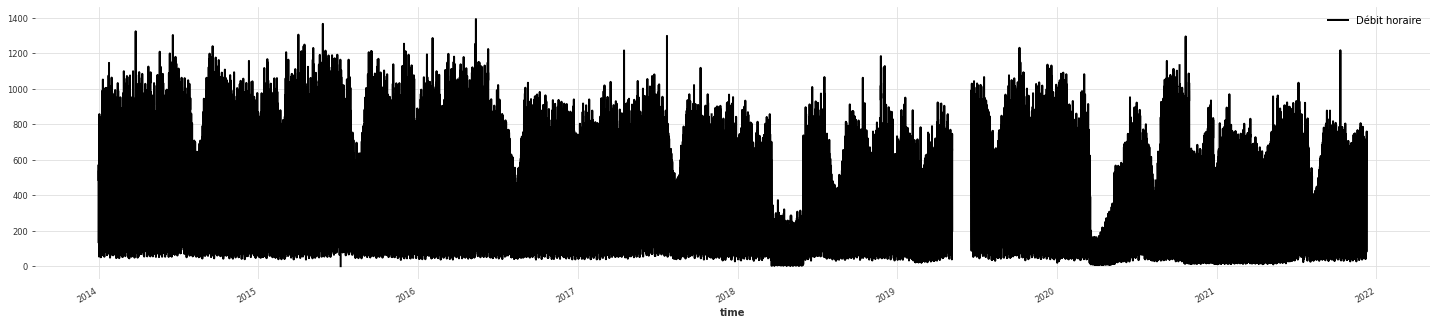

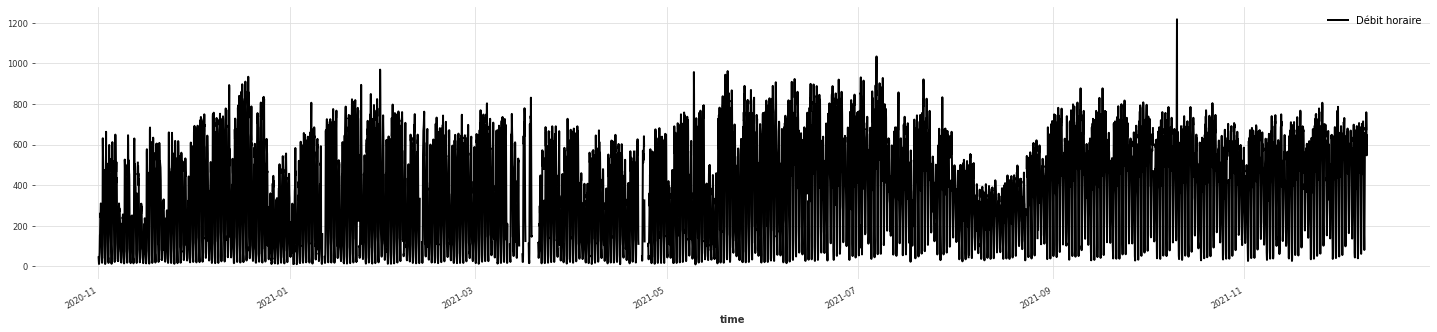

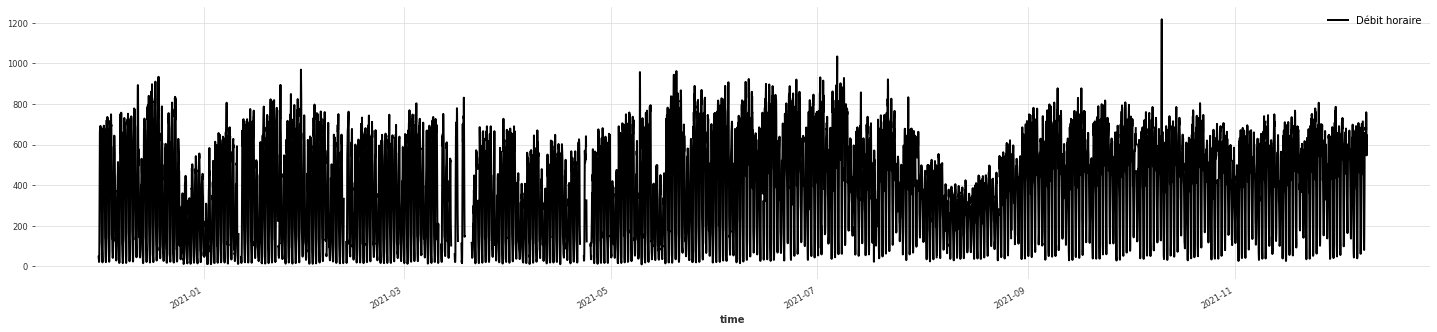

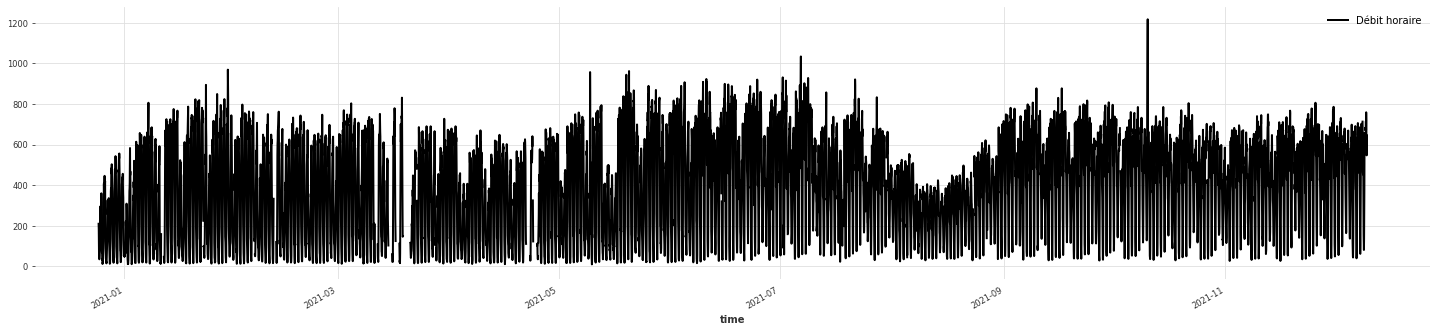

In [419]:
plt.rcParams['figure.figsize'] = [25, 5]
ts.univariate_component(0).plot(label='Débit horaire')
ts.drop_before(pd.Timestamp("2020-11-01")).univariate_component(0).plot(label='Débit horaire', new_plot=True)
ts.drop_before(pd.Timestamp("2020-12-01")).univariate_component(0).plot(label='Débit horaire', new_plot=True)
ts.drop_before(pd.Timestamp("2020-12-25")).univariate_component(0).plot(label='Débit horaire', new_plot=True)

#### taux d'occupation

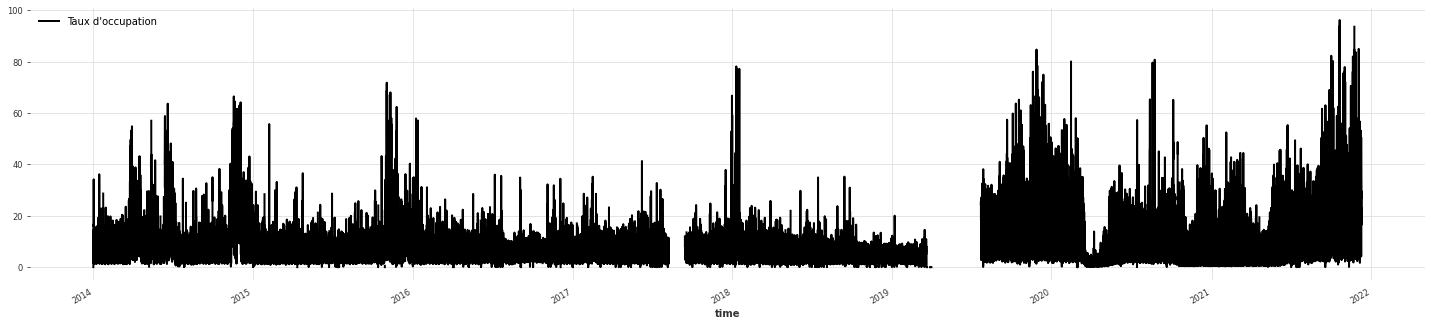

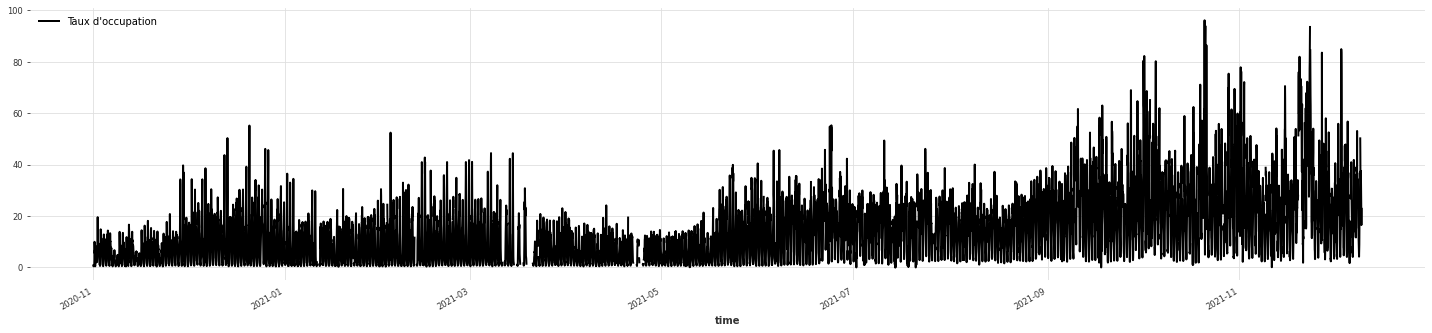

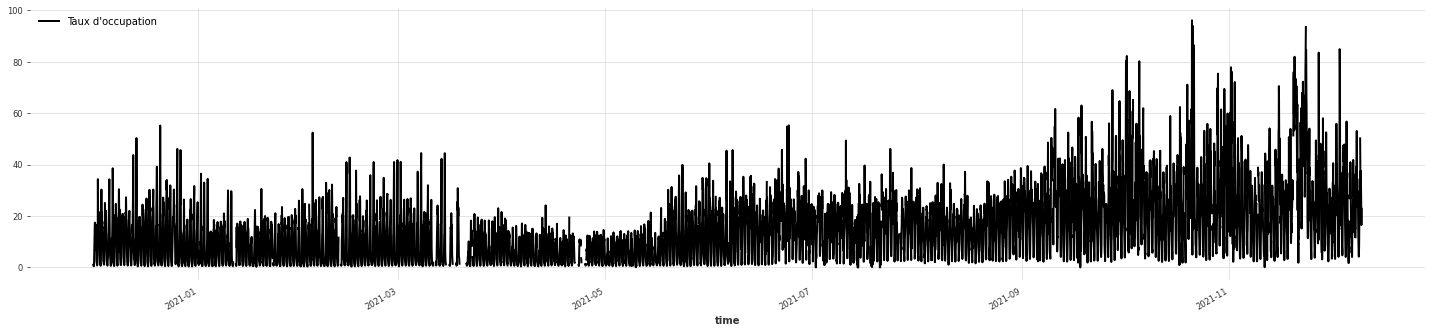

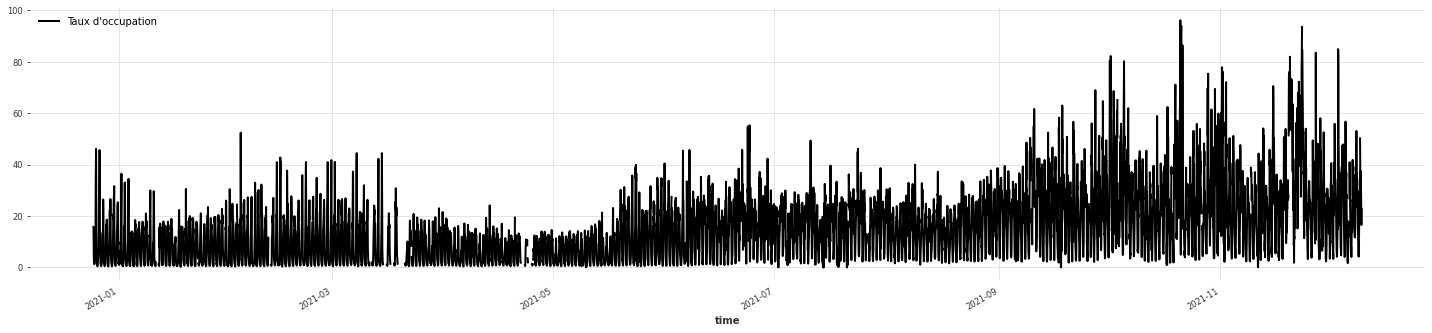

In [402]:
# plot component of index 0 after 2021-11-04 
ts.univariate_component(1).plot(label="Taux d'occupation")
ts.drop_before(pd.Timestamp("2020-11-01")).univariate_component(1).plot(label="Taux d'occupation", new_plot=True)
ts.drop_before(pd.Timestamp("2020-12-01")).univariate_component(1).plot(label="Taux d'occupation", new_plot=True)
ts.drop_before(pd.Timestamp("2020-12-25")).univariate_component(1).plot(label="Taux d'occupation", new_plot=True)

#### effet etat_barre

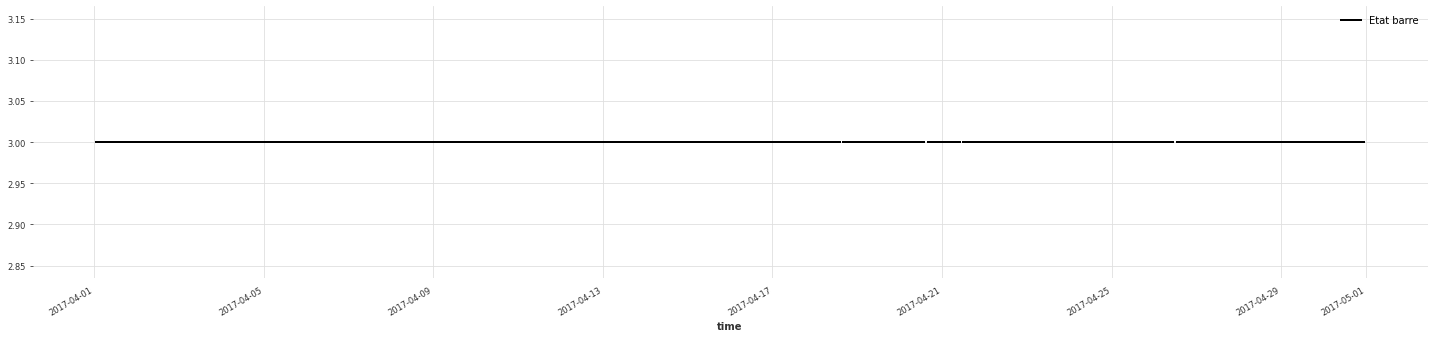

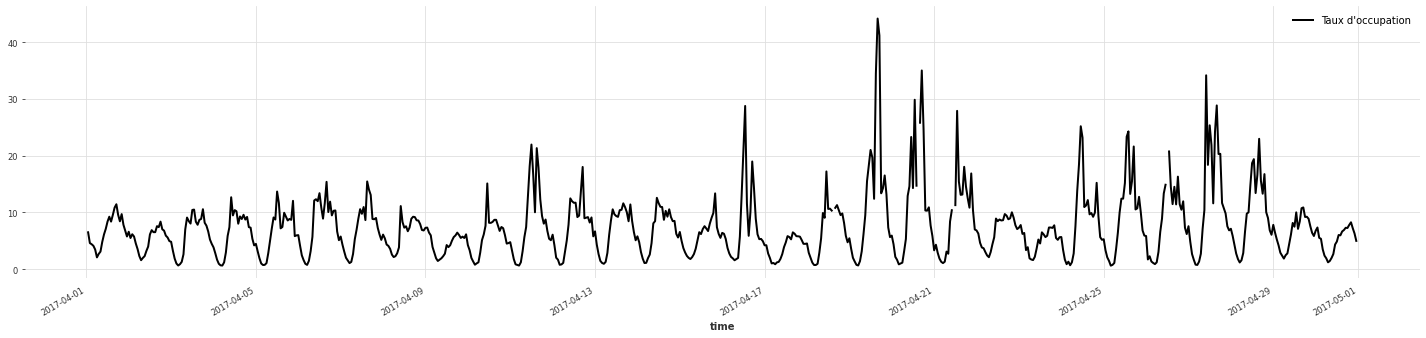

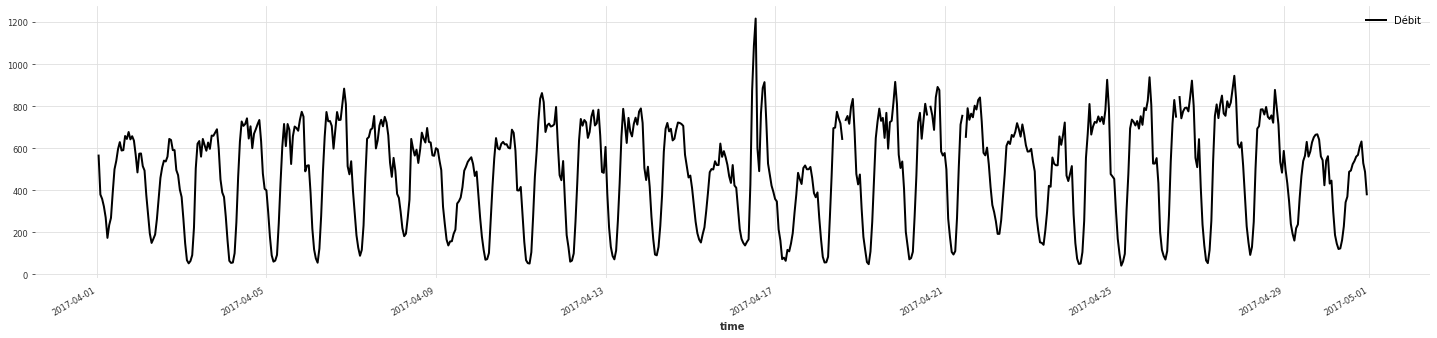

In [108]:
ts.univariate_component(2).drop_before(pd.Timestamp("2017-04-01")).drop_after(pd.Timestamp("2017-05-01")).plot(label="Etat barre")
ts.univariate_component(1).drop_before(pd.Timestamp("2017-04-01")).drop_after(pd.Timestamp("2017-05-01")).plot(label="Taux d'occupation", new_plot=True)
ts.univariate_component(0).drop_before(pd.Timestamp("2017-04-01")).drop_after(pd.Timestamp("2017-05-01")).plot(label="Débit", new_plot=True)


Saisonnalités:
* chaque année ?
* chaque mois
* chaque jour

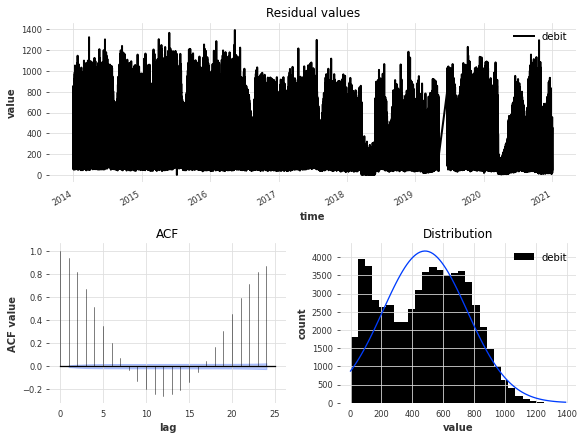

In [109]:
from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis, plot_hist, extract_trend_and_seasonality
plot_residuals_analysis(ts.univariate_component(0), num_bins=30)

In [420]:
df['arc'].unique()

array(['Sts_Peres'], dtype=object)

In [421]:
# save df
save_filename = "sts_peres-2014-2021"
df.to_csv("raw_data/"+save_filename+".csv")

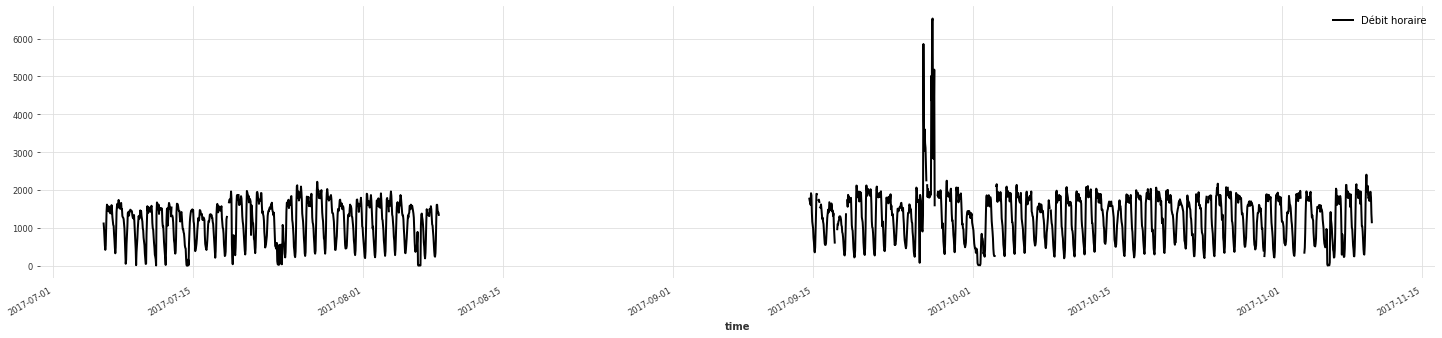

In [406]:
tdf = ts.pd_dataframe()
ts.drop_before(pd.Timestamp("2017-07-06")).drop_after(pd.Timestamp("2017-11-10")).univariate_component(0).plot(label='Débit horaire', new_plot=True)

In [422]:
tdf.isna().sum()

component
debit         4333
occupation    4333
etat_barre    4333
dtype: int64

In [423]:
# fill missing values in tdf (only 3 consecutive hours)
tdf.interpolate(method='linear', limit=3, inplace=True)
tdf.isna().sum()

component
debit         4150
occupation    4150
etat_barre    4150
dtype: int64

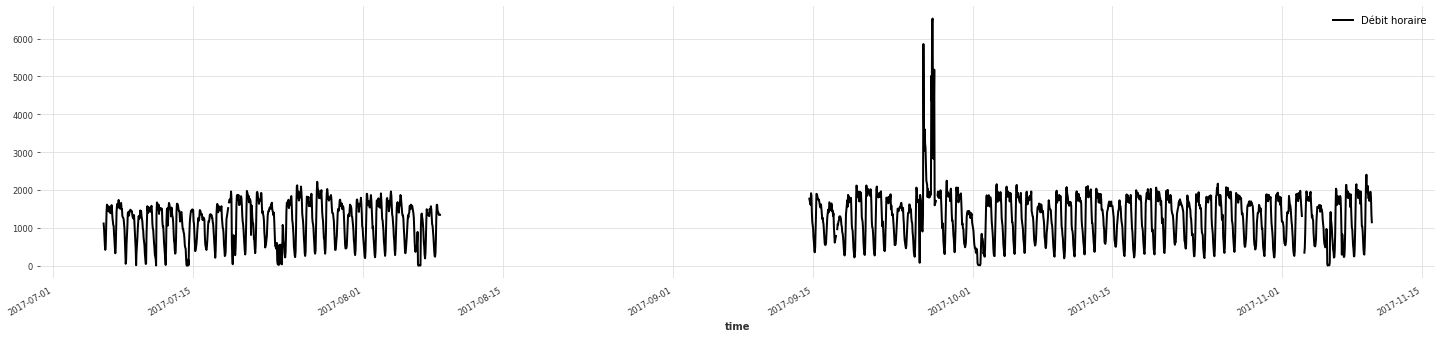

In [409]:
ts = TimeSeries.from_dataframe(tdf)
ts.drop_before(pd.Timestamp("2017-07-06")).drop_after(pd.Timestamp("2017-11-10")).univariate_component(0).plot(label='Débit horaire', new_plot=True)

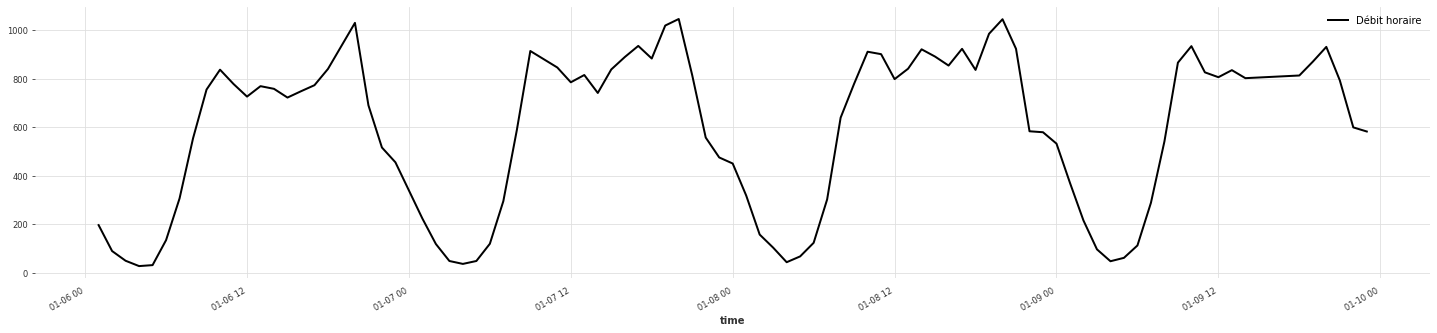

In [116]:
ts = TimeSeries.from_dataframe(tdf)
ts.drop_before(pd.Timestamp("2020-01-06")).drop_after(pd.Timestamp("2020-01-10")).univariate_component(0).plot(label='Débit horaire', new_plot=True)

In [424]:
save_filename

'sts_peres-2014-2021'

In [425]:

tdf.to_csv(f"processed_data/{save_filename}-proc.csv")

In [10]:
from darts.dataprocessing.transformers import MissingValuesFiller
import pandas as pd
from darts import TimeSeries

df = pd.read_csv("data_final/sts_peres-2014-2021.csv").set_index('time')
df.index = pd.to_datetime(df.index, utc=False)
df.sort_index(inplace=True)
value_cols = ['debit', "occupation"]
series = TimeSeries.from_dataframe(df, 
                    value_cols=value_cols,
                    fill_missing_dates=True,
                    freq='H'
                    )
series

<TimeSeries (DataArray) (time: 69600, component: 2, sample: 1)>
array([[[486.     ],
        [  6.17889]],

       [[571.     ],
        [  6.66222]],

       [[532.     ],
        [  5.56611]],

       ...,

       [[571.     ],
        [  8.91667]],

       [[547.     ],
        [  6.875  ]],

       [[645.     ],
        [  8.15444]]])
Coordinates:
  * time       (time) datetime64[ns] 2014-01-01T01:00:00 ... 2021-12-10
  * component  (component) object 'debit' 'occupation'
Dimensions without coordinates: sample

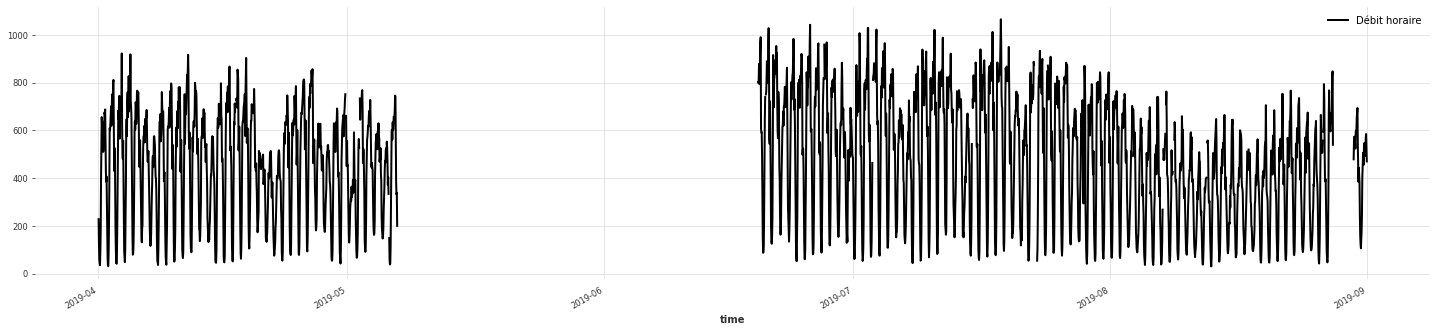

In [14]:
plt.rcParams['figure.figsize'] = [25, 5]
series.drop_before(pd.Timestamp("2019-04-01")).drop_after(pd.Timestamp("2019-09-01")).univariate_component(0).plot(label='Débit horaire')

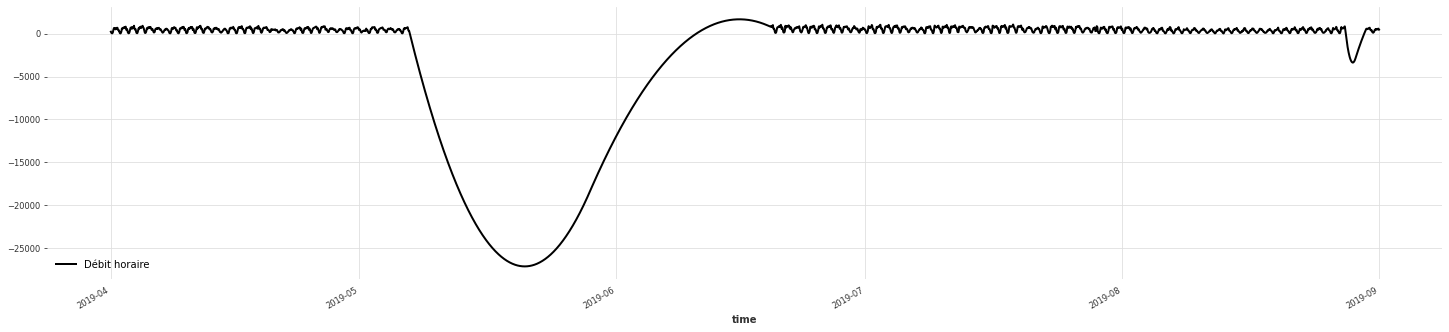

In [16]:
filler = MissingValuesFiller()
filled = filler.transform(series, method='quadratic')
filled.drop_before(pd.Timestamp("2019-04-01")).drop_after(pd.Timestamp("2019-09-01")).univariate_component(0).plot(label='Débit horaire')


/home/nouamane/miniconda/envs/darts/lib/python3.9/site-packages/scipy/interpolate/polyint.py:324: RuntimeWarning: overflow encountered in multiply
  pi = w*pi
/home/nouamane/miniconda/envs/darts/lib/python3.9/site-packages/scipy/interpolate/polyint.py:325: RuntimeWarning: invalid value encountered in add
  p += pi[:,np.newaxis] * self.c[k]
/home/nouamane/miniconda/envs/darts/lib/python3.9/site-packages/scipy/interpolate/polyint.py:325: RuntimeWarning: invalid value encountered in multiply
  p += pi[:,np.newaxis] * self.c[k]


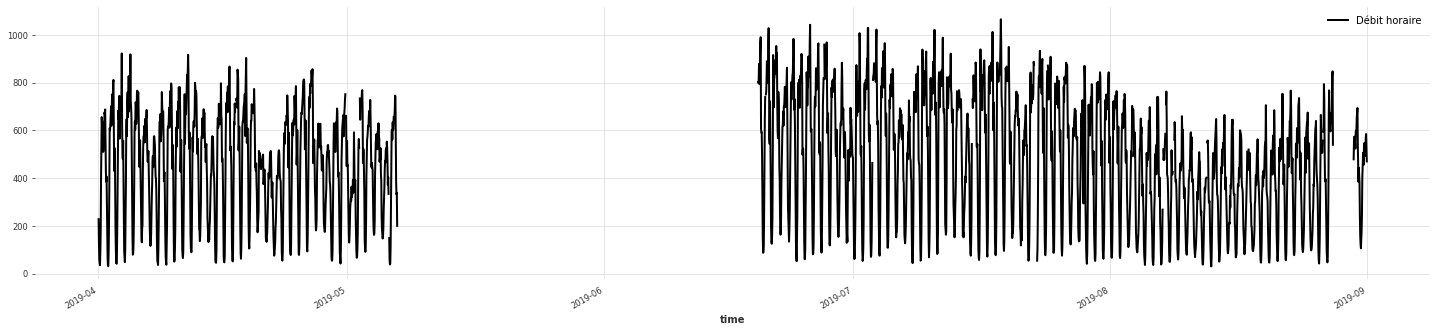

In [24]:
for method in ['linear', 'time', 'index', 'values', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'barycentric', 'krogh', 'spline', 'polynomial', 'from_derivatives', 'piecewise_polynomial', 'pchip', 'akima', 'cubicspline']:
    filler = MissingValuesFiller()
    filled = filler.transform(series.drop_before(pd.Timestamp("2019-04-01")).drop_after(pd.Timestamp("2019-09-01")), method="krogh")
    filled.univariate_component(0).plot(label='Débit horaire', new_plot=True)
    break
